In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from model_build import build_unet

c:\Users\slywi\anaconda3\envs\tf_gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
input_shape = (256, 256, 3)
model = build_unet(input_shape=input_shape)
model.load_weights("model_best.h5")

In [20]:
def predict_on_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found: {image_path}")
        return

    img = cv2.resize(img, (256, 256))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = img_rgb.astype(np.float32) / 255.0
    x_input = np.expand_dims(x, axis=0)

    y_pred = model.predict(x_input, verbose=0)[0]
    y_pred_bin = (y_pred > 0.5).astype(np.float32).squeeze()

    mask_color = np.zeros_like(img_rgb)
    mask_color[:, :, 0] = (y_pred_bin * 255).astype(np.uint8)

    overlay = cv2.addWeighted(img_rgb, 0.7, mask_color, 0.3, 0)


    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(y_pred_bin, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

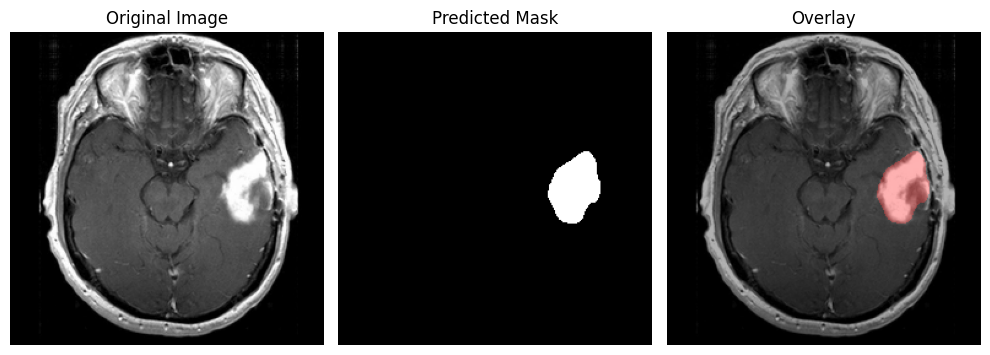

In [21]:
if __name__ == "__main__":
    test_image_path = "E:/brain_tumor_segmentation/test images/tumor2.jpg"
    predict_on_image(test_image_path)